<a href="https://colab.research.google.com/github/AlexFMo/computational-chemistry/blob/main/DFT_Workshops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Density Functional Theory with ASE and GPAW**

Interactive hands-on tutorial on how to use Density Functional Theory (DFT). It enables the student to run basic DFT calculations using the Atomic Simulation Environment (ASE) in conjunction with the DFT code GPAW. Originally taught as a guest lecture at Stanford University in course ME420 Advanced Electrochemistry.

Tutorial by Peter Schindler, Ph.D.

https://peterschindler.github.io/




## **Installation, GPAW and ASE**

In [1]:
!pip install ase==3.23.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.2 MB/s eta 0:00:00


In [2]:
!ase info

platform                 Linux-6.1.85+-x86_64-with-glibc2.35
python-3.11.11           /usr/bin/python3
ase-3.23.0               /usr/local/lib/python3.11/dist-packages/ase
numpy-1.26.4             /usr/local/lib/python3.11/dist-packages/numpy
scipy-1.13.1             /usr/local/lib/python3.11/dist-packages/scipy
matplotlib-3.10.0        /usr/local/lib/python3.11/dist-packages/matplotlib
spglib                   not installed
ase_ext                  not installed
flask-3.1.0              /usr/local/lib/python3.11/dist-packages/flask
psycopg2-2.9.10 (dt dec pq3 ext lo64) /usr/local/lib/python3.11/dist-packages/psycopg2
pyamg                    not installed


In [5]:
# %%capture
!apt install python3-mpi4py cython3 libxc-dev gpaw-data
!pip -q install gpaw pymatgen

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cython3 is already the newest version (0.29.28-1ubuntu3).
gpaw-data is already the newest version (0.9.20000-2).
libxc-dev is already the newest version (5.1.7-1ubuntu1).
python3-mpi4py is already the newest version (3.1.3-1build2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00


In [6]:
!gpaw info

 -------------------------------------------------------------------------------------------------
| python-3.11.11    /usr/bin/python3                                                              |
| gpaw-25.1.0       /usr/local/lib/python3.11/dist-packages/gpaw/                                 |
| ase-3.23.0        /usr/local/lib/python3.11/dist-packages/ase/                                  |
| numpy-1.26.4      /usr/local/lib/python3.11/dist-packages/numpy/                                |
| scipy-1.13.1      /usr/local/lib/python3.11/dist-packages/scipy/                                |
| libxc-5.1.7       yes                                                                           |
| _gpaw             /usr/local/lib/python3.11/dist-packages/_gpaw.cpython-311-x86_64-linux-gnu.so |
| MPI enabled       yes                                                                           |
| OpenMP enabled    no                                                                            |
|

## **Code**

In [8]:
from ase import Atoms #The Atoms object is used to define and work with atomic structure in ASE
from ase.io import read, write #The ase.io module is used to read |and write crystal/molecular structure files
from gpaw import GPAW, PW #GPAW will be our main DFT calculator and PW is the plane wave mode

### Create an atomic structure

In [11]:
h2 = Atoms('H2', [(0, 0, 0), (0, 0, 0.74)])
h2.center(vacuum=2.5)

In [12]:
write('h2.cif', h2)

In [13]:
print(h2.cell)
print()
print(h2.positions)

Cell([5.0, 5.0, 5.74])

[[2.5  2.5  2.5 ]
 [2.5  2.5  3.24]]


### Set GPAW calculator

In [14]:
calc = GPAW(xc='LDA',
            kpts=(1,1,1),
            mode=PW(500),
            txt='h2.txt')

In [15]:
h2.set_calculator(calc)

<ipython-input-15-d75296235496>:1: DeprecationWarning: Please use atoms.calc = calc
  h2.set_calculator(calc)


### Evaluate Properties

In [16]:
print(h2.get_potential_energy())

-6.7317890739894475


In [17]:
result = h2.get_potential_energy()
result

-6.7317890739894475

### Testing for energy cutoff convergence

In [19]:
import time

In [20]:
cutoffs = [200,300,400,500,1000]
times = []
energies = []

for cutoff in cutoffs:
  start_time = time.time()
  calc = GPAW(xc='LDA',
              kpts=(1,1,1),
              mode=PW(cutoff),
              txt='h2.txt')
  h2.set_calculator(calc)
  energies.append(h2.get_potential_energy())
  times.append(time.time() - start_time)
print(times)  # seconds
print(energies)  # eV

<ipython-input-20-3e6ca28a1769>:11: DeprecationWarning: Please use atoms.calc = calc
  h2.set_calculator(calc)


[0.9220402240753174, 1.1491408348083496, 1.706489086151123, 2.6036527156829834, 5.361384153366089]
[-6.368370601170564, -6.566280756120176, -6.693834722327357, -6.7317890739894475, -6.750055588974404]


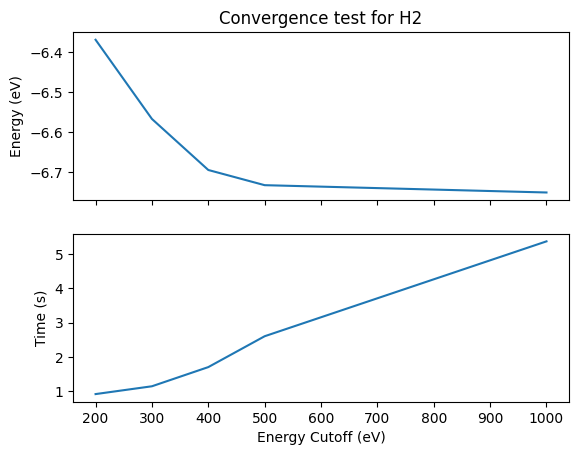

In [21]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, sharex=True)
ax[0].plot(cutoffs, energies)
ax[0].set_ylabel('Energy (eV)')
ax[0].set_title('Convergence test for H2')

ax[1].plot(cutoffs, times)
ax[1].set_ylabel('Time (s)')
ax[1].set_xlabel('Energy Cutoff (eV)')

plt.show()

###Calculating the electron density and plotting a contour plot

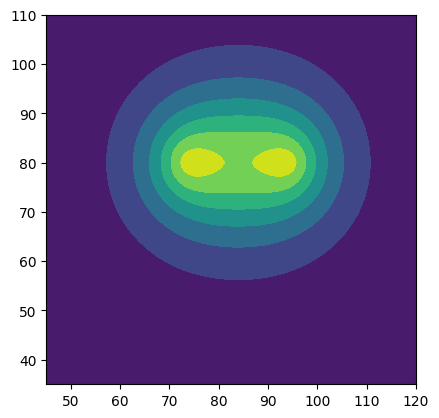

In [ ]:
import numpy as np

n = calc.get_all_electron_density(gridrefinement=4)

nred = np.sum(n, axis=0) #sum over density in x-direction
#print(np.shape(nred))

fig, ax = plt.subplots()
ax.contourf(nred)
ax.set_xlim([45, 120])
ax.set_ylim([35, 110])
ax.set_aspect(1)
plt.show()

## How to use GPAW to perform basic DFT tasks in Python

Dr Sherif Abbas of RMIT

https://www.youtube.com/watch?v=KhAtlJCkcZ8&t=2540s


In [ ]:
from ase import Atoms
from gpaw import GPAW
from ase.optimize import QuasiNewton
# from ase.io import read, write


In [ ]:
a = 10
d = 1.17103

CO2 = Atoms('CO2',
            positions = [[a/2,a/2,a/2],
                         [a/2-d,a/2,a/2],
                         [a/2+d,a/2,a/2]],
            cell = (a,a,a))

In [ ]:
calc_PBE = GPAW(xc='PBE')
CO2.set_calculator(calc_PBE)


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  25.1.0
 |___|_|             

User:   ???@fa4a0e578daf
Date:   Mon Feb 17 21:09:13 2025
Arch:   x86_64
Pid:    12896
CWD:    /content
Python: 3.11.11
gpaw:   /usr/local/lib/python3.11/dist-packages/gpaw
_gpaw:  /usr/local/lib/python3.11/dist-packages/
        _gpaw.cpython-311-x86_64-linux-gnu.so
ase:    /usr/local/lib/python3.11/dist-packages/ase (version 3.24.0)
numpy:  /usr/local/lib/python3.11/dist-packages/numpy (version 1.26.4)
scipy:  /usr/local/lib/python3.11/dist-packages/scipy (version 1.15.2)
libxc:  5.1.7
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  xc: PBE



<ipython-input-47-e96ed2262eb3>:2: FutureWarning: Please use atoms.calc = calc
  CO2.set_calculator(calc_PBE)


In [ ]:
relax = QuasiNewton(CO2)
relax.run(fmax=0.05)

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

species:
  C:
    name: Carbon
    id: 4aa54d4b901d75f77cc0ea3eec22967b
    Z: 6.0
    valence: 4
    core: 2
    charge: 0.0
    file: /usr/share/gpaw-setups/C.PBE.gz
    compensation charges: {type: gauss,
                           rc: 0.20,
                           lmax: 2}
    cutoffs: {filter: 1.14,
              core: 1.14}
    projectors:
      #              energy  rcut
      - 2s(2.00)   -13.751   0.635
      - 2p(2.00)    -5.284   0.635
      -  s          13.461   0.635
      -  p          21.927   0.635
      -  d           0.000   0.635
  
    # Using partial waves for C as LCAO basis

  O:
    name: Oxygen
    id: 32ecd46bf208036f09c70b0ec9a88b78
    Z: 8.0
    valence: 6
    core: 2
    charge: 0.0
    file: /usr/share/gpaw-setups/O.PBE.gz
    compensation charges: {type: gauss,
                           rc: 0.21,
                           lmax: 2}
    cutoffs: {filter

/usr/local/lib/python3.11/dist-packages/gpaw/calculator.py:744: DeprecatedParameterWarning: Finite-difference mode implicitly chosen; it will be an error to not specify a mode in the future
  warnings.warn(


Hamiltonian:
  XC and Coulomb potentials evaluated on a 96*96*96 grid
  Using the PBE Exchange-Correlation functional
  Interpolation: tri-quintic (5. degree polynomial)
  Poisson solver: FastPoissonSolver using
    Stencil: 6*3+1=19 point O(h^6) finite-difference Laplacian
    FFT axes: []
    FST axes: [0, 1, 2]
 

XC parameters: PBE with 2 nearest neighbor stencil

Memory estimate:
  Process memory now: 647.31 MiB
  Calculator: 65.02 MiB
    Density: 27.82 MiB
      Arrays: 21.21 MiB
      Localized functions: 1.86 MiB
      Mixer: 4.75 MiB
    Hamiltonian: 14.01 MiB
      Arrays: 13.87 MiB
      XC: 0.00 MiB
      Poisson: 0.00 MiB
      vbar: 0.13 MiB
    Wavefunctions: 23.20 MiB
      Arrays psit_nG: 9.51 MiB
      Eigensolver: 13.48 MiB
      Projections: 0.00 MiB
      Projectors: 0.21 MiB

Total number of cores used: 1

Number of atoms: 3
Number of atomic orbitals: 12
Number of bands in calculation: 12
Number of valence electrons: 16
Bands to converge: occupied

... initialize

True

In [ ]:
CO2.get_distance(0,1)

1.17103